reference : https://itstory1592.tistory.com/13

In [3]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [4]:
wine.head(10) # class가 0이면 화이트 와인, 1이면 레드 와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
5,9.4,1.8,3.51,0.0
6,9.4,1.6,3.30,0.0
7,10.0,1.2,3.39,0.0
8,9.5,2.0,3.36,0.0
9,10.5,6.1,3.35,0.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [7]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [12]:
# 결정 트리는 데이터 스케일링 과정이 필요 없다
# 개별적인 특성을 기준으로 데이터에게 질문을 던져 분류하기 때문.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.996921300750433
0.8584615384615385


위는 train data에 대한 점수가 상대적으로 너무 높기 때문에 overfitting 되었다고 할 수 있다.

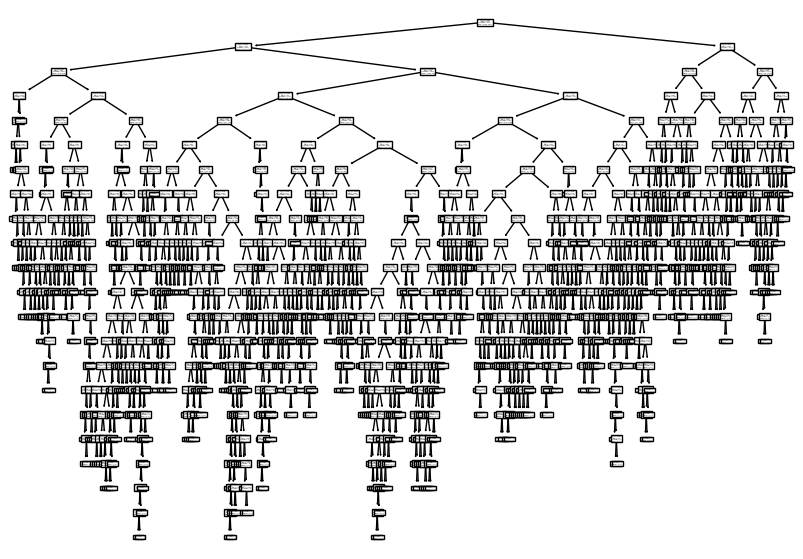

In [13]:
# 해당 모델에 대한 모양을 그림으로 나타내어 확인하기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- max_depth를 설정하지 않아 가지가 수많이 생긴 모습을 확인할 수 있다.  
- 따라서 가지치기(Pruning)을 통해 결정 트리의 depth를 조절할 필요가 있다.

- 그 전에, 위의 tree 이미지를 구체적으로 보기 위해서, max_depth를 1로 설정해서 그려보자  

- 매개변수 filled를 True로 설정해주면 클래스의 비율에 따라 노드 색상을 다르게 칠해준다.

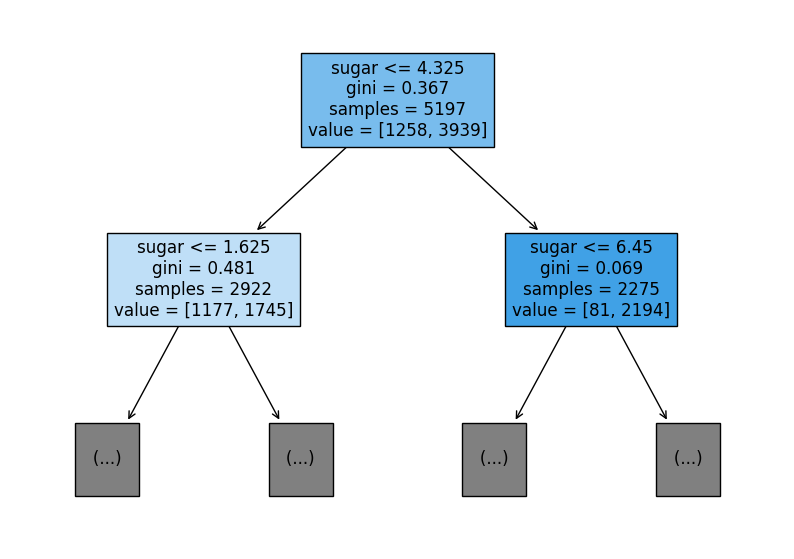

In [14]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [15]:
# 가지치기(Pruning)

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


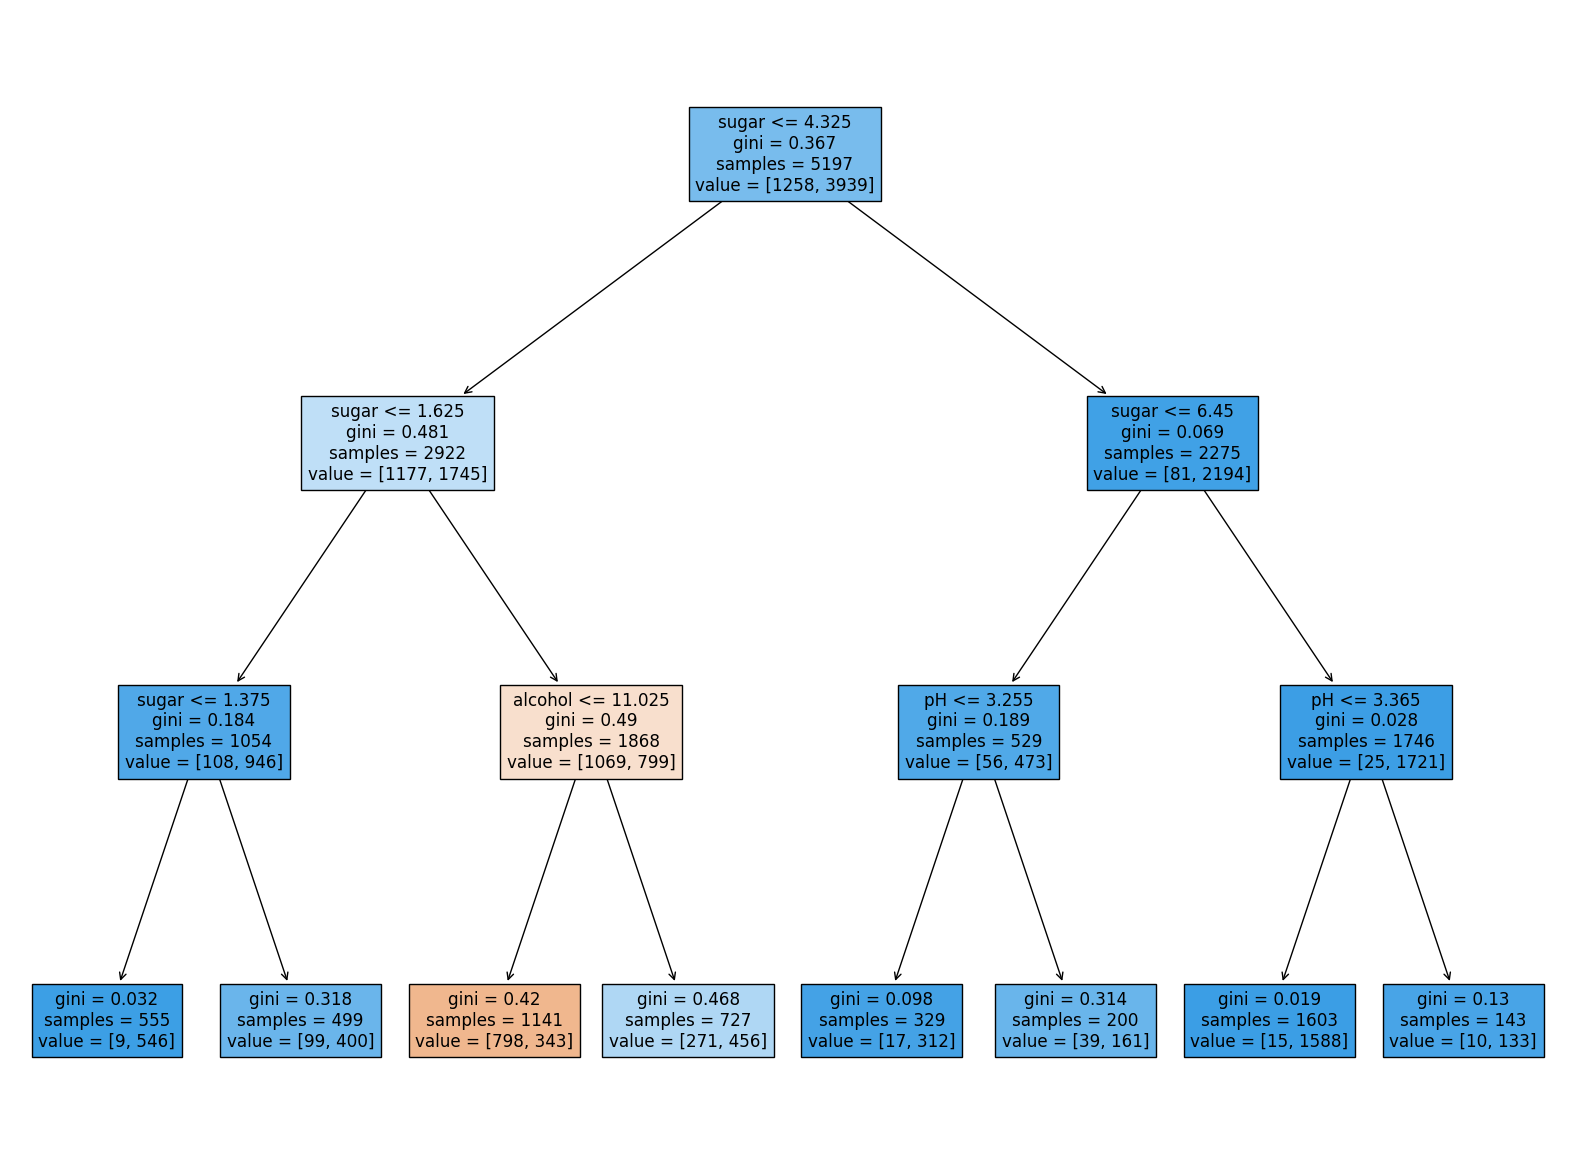

In [16]:
# 가지치기한 결정트리 시각화
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [22]:
# feature의 중요도 출력
print('   alcohol     sugar      pH')
print(dt.feature_importances_)

   alcohol     sugar      pH
[0.12345626 0.86862934 0.0079144 ]
